#Programming Lab 1
Daniel Diamont
UT EID: dd28977

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline

##Q1)

In [28]:
# Create two normal distributions
n1 = np.random.normal(loc = -10, scale = 5, size = 1000)
n2 = np.random.normal(loc = 10, scale = 5, size = 1000)


###a)

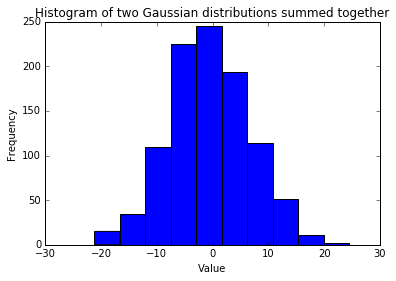

estimated mean of the new distribution is: -0.5227385897197017
estimated variance of the new distribution is: 51.13410146768491


In [29]:
# take the sum of 2 gaussians by adding two sets of 1000 points, point by point
n_sum = n1 + n2

# plot in a histogram
plt.hist(n_sum)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of two Gaussian distributions summed together")
plt.show()

#estimate mean and variance of sum
mean = np.mean(n_sum, dtype=np.float64)
print("estimated mean of the new distribution is: " + str(mean))
var = np.var(n_sum, dtype=np.float64)
print("estimated variance of the new distribution is: " + str(var))

##Q2)

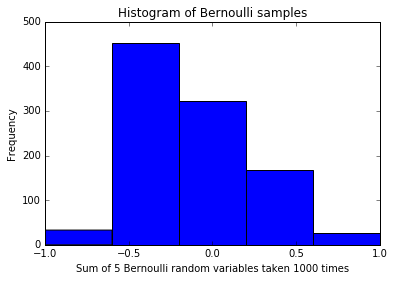

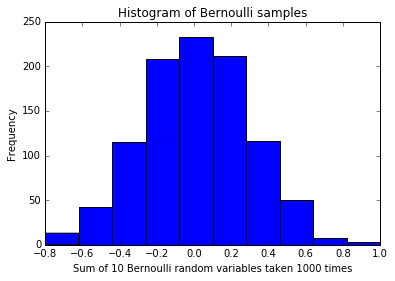

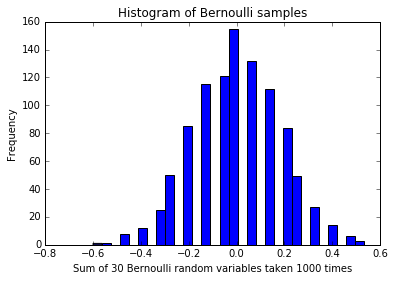

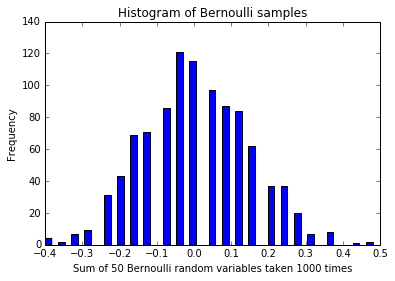

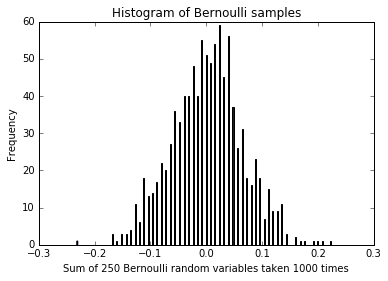

In [5]:
# define Xi random variable (iid Bernoulli ({-1,1})
def sample_Xi(n):
    sum = np.zeros(n)
    
    for i in range(n):
        sample = np.random.uniform()
        if(sample >= 0.5):
            sum[i] = 1
        else:
            sum[i] = -1
    
    return np.sum(sum)/n
    
def plot_hist(n, draws=1000):
    Zn = np.zeros(draws)
    
    for i in range(draws):
        Zn[i] = sample_Xi(n)
        
    plt.hist(Zn, bins=n)
    plt.title("Histogram of Bernoulli samples")
    plt.xlabel("Sum of " + str(n) + " Bernoulli random variables taken " + str(draws) + " times")
    plt.ylabel("Frequency")
    plt.show()
    
    
plot_hist(5)
plot_hist(10)
plot_hist(30)
plot_hist(50)
plot_hist(250)


##Q3)

In [6]:
# generate 25,000 samples from a gaussian distribution with mean 0 and std dev 5
norm_dist = np.random.normal(loc = 0, scale = 5, size = 25000)

# calculate estimated mean
mean_est = np.sum(norm_dist)/(norm_dist.size)
print("Estimated mean of distribution is: " + str(mean_est))

#calculate variance E[(X - E[X])^2]
x_minus_mean_sq = (norm_dist - mean_est)*(norm_dist - mean_est)
var_est = np.sum(x_minus_mean_sq)/(x_minus_mean_sq.size)

#calculate standard deviation as sqrt(variance)
std_dev = np.sqrt(var_est)

print("Estimated std dev of distribution is: " + str(std_dev))

Estimated mean of distribution is: -0.011535187621614918
Estimated std dev of distribution is: 5.012009095509666


##Q4)

In [30]:
#mean matrix
u = [-5,5]
#covariance matrix
covar = [[20, 0.8],[0.8,30]]

# generate 10,000 samples of 2D data from Gaussian distribution
d1,d2 = np.random.multivariate_normal(u, covar, 10000).T

#estimate the mean of the distribution
u1 = np.sum(d1)/d1.size
u2 = np.sum(d2)/d2.size
u_est = u1 + u2

#estimate the covariance matrix for the data
t1 = (d1-u1)*(d1-u1)
var1 = np.sum(t1)/t1.size #variance of distribution 1
t2 = (d2-u2)*(d2-u2)
var2 = np.sum(t2)/t2.size #variance of distribution 2

t_co = (d1-u1)*(d2-u2)
covar = np.sum(t_co)/t_co.size #covariance of distribution 1 and 2

cov = [] # covariance matrix
cov.append([var1,covar])
cov.append([covar,var2])

print("Estimated mean of the distribution: " + str(u_est))
print("Covariance matrix of the distribution: ")

df = pd.DataFrame(cov)
df.rename(index={0:'d1',1:'d2'}, inplace=True)
df.rename(columns={0:'d1',1:'d2'}, inplace=True)
display(df)


Estimated mean of the distribution: -0.0783093477072212
Covariance matrix of the distribution: 


,d1,d2
d1,19.952790,0.724301
d2,0.724301,30.813580


##Q5)